In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
df = pd.read_csv("/content/WineQT.csv")


In [ ]:
print(df.head())
print(df.info())
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Missing Values

In [ ]:
print(df.isnull().sum())
df = df.dropna()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
X = df.drop(["quality", "Id"], axis=1)
y = df["quality"]

Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Models

Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 0.7117903930131004


 Stochastic Gradient Descent (SGD)

In [ ]:
sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd.fit(X_train_scaled, y_train)
sgd_preds = sgd.predict(X_test_scaled)
print("SGD Accuracy:", accuracy_score(y_test, sgd_preds))

SGD Accuracy: 0.5764192139737991


Support Vector Classifier (SVC)

In [ ]:
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)
svc_preds = svc.predict(X_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, svc_preds))

SVC Accuracy: 0.6681222707423581


In [ ]:
print("Random Forest:\n", classification_report(y_test, rf_preds))
print("SGD:\n", classification_report(y_test, sgd_preds))
print("SVC:\n", classification_report(y_test, svc_preds))

Random Forest:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.86      0.79        97
           6       0.69      0.72      0.70        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.68      0.71      0.69       229

SGD:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.67      0.69        97
           6       0.51      0.68      0.58        92
           7       0.36      0.14      0.20        29
           8       0.00      0.00      0.00         3

    accuracy                           0.58       229
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

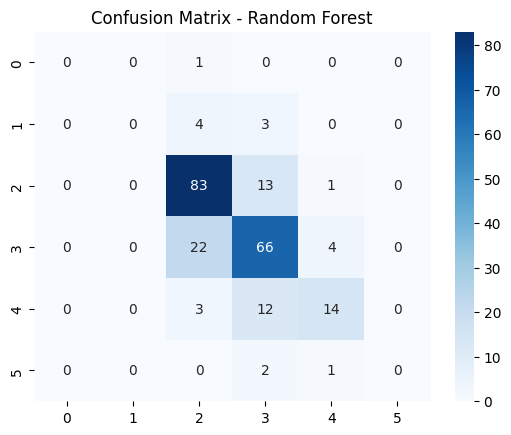

In [ ]:
# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Visualize Feature Importance (Random Forest)

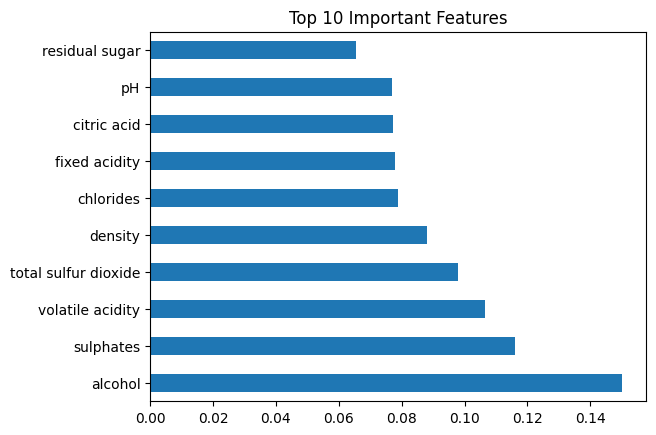

In [ ]:
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()